# $\chi^{2}$ test 

### Data
Researchers collected data on the first, or primary, tumor present in $339$ patients in a hospital in Yugoslavia.
Patients age was classified as  ess than 30 yrs, between 30 and 59, and 60 years or greater.
Sex was classified as Male or Female; hisotlogical type of the primary tumor as epidermoid, adeno, or anaplastic; and  degree of differentiation as well, fair, or poorly differentiated. 
The primary tumor was classified into one of $13$ locations in the body.

Formatted and cleaned data is on our [PHDS-I Github](https://github.com/computationalUncertaintyLab/2020F_PHDSI/tree/master/r8) and the link to the original data is [here](https://archive.ics.uci.edu/ml/datasets/primary+tumor). 

### Informal Hypothesis
We will use a chi-square test to analyze whether or not there is a statistically significant differece between where the tumor is found in the body and the age of the patient. 

In [84]:
import pandas as pd # use pandas to import the data

# link to the web
d = pd.read_csv("https://raw.githubusercontent.com/computationalUncertaintyLab/2020F_PHDSI/master/r8/tumorData.csv")

# print out the varables of the data set
print(d.columns)

# print a few rows to get a feel for the data
print(d.head(5))

Index(['class', 'age', 'sex', 'histtype', 'degreeOfD', 'bone', 'marrow',
       'lung', 'pleura', 'perit', 'liver', 'brain', 'skin', 'neck',
       'supraclav', 'axill', 'media', 'abdom'],
      dtype='object')
  class  age sex histtype degreeOfD bone marrow lung pleura perit liver brain  \
0  lung  <30   M      NaN    poorly    N      N    Y      N     N     N     N   
1  lung  <30   M      NaN    poorly    N      N    N      N     N     Y     N   
2  lung  <30   F    adeno    poorly    Y      N    N      N     N     N     N   
3  lung  <30   F      NaN    poorly    Y      N    Y      Y     N     N     N   
4  lung  <30   F      NaN    poorly    Y      N    Y      Y     N     N     N   

  skin neck supraclav axill media abdom  
0    N    N         N     N     N     N  
1    N    N         Y     N     Y     N  
2    N    N         N     N     Y     N  
3    N    N         N     N     Y     N  
4    N    N         N     N     Y     N  


In [83]:
# Print out the number of rows (observations)
Nobs = len(d)
print("Number of patients = {:d}".format(Nobs))

Number of patients = 339


### Cross tabs

A chisquare test requires us to build a table of observed frequencies and a second table of expected frequencies. 
We can build a table of observed frequencies using Pandas. 
Pandas has a function called [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) that takes a list of indices (the rows of the observed table), a list of columns (the columns of the observed table), and outputs the frequencies in each pair of categories contained in the rows and columns.  

In our example, we want the observed frequencies in the three age groups and the different "classes" of tumor.

In [86]:
# Crosstab function
O = pd.crosstab(index=d["age"]       # the rows (index)
                ,columns=d["class"]) # the columns (columns)
O # lets look at the table

class,bladder,breast,cervixuteri,colon,corpus uteri,duoden & sm.int,esophasus,gallblader,head & neck,kidney,...,lung,ovary,pancreas,prostate,rectum,salivary glands,stomach,testis,thyroid,vagina
age,,,,,,,,,,,,,,,,,,,,,
30-59,1,20,2,7,4,0,8,2,11,13,...,57,25,15,6,2,2,22,1,8,1
<30,0,2,0,1,0,0,0,0,1,4,...,6,0,1,0,0,0,6,0,1,0
>=60,1,2,0,6,2,1,1,14,8,7,...,21,4,12,4,4,0,11,0,5,0


### The Chisquare test using Scipy

Scipy contains a function [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) that can compute a chisquare test.
The input is a crosstab of observed frequencies and the output is: the Chisquare test statistic, the pvalue, the degrees of freedom for this test, and the expected frequencies (the **E** from our test).
Python creates the E table from our O table.

Let's compute the chisquare test and also plot the observed Freuqncies minus the expected frequencies divided by the square root of the expected frequencies. This metric is called **Pearson residuals**. 

In [ ]:
from scipy.stats import chi2_contingency
testStat, pvalue,df,E = scipy.stats.chi2_contingency(O)

Chisqares test statistic = 67.78
Pvalue = 0.004
hey
0.0039450694182352475


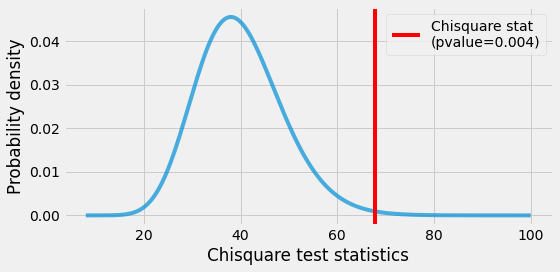

In [111]:
print("Chisqares test statistic = {:.2f}".format(testStat))
print("Pvalue = {:.3f}".format(pvalue))

nullDist = scipy.stats.chi2(df).pdf
domain = np.linspace(8,100,200)

fig,ax = plt.subplots()
ax.plot(domain,nullDist(domain),alpha=0.70)

ax.set_xlabel("Chisquare test statistics")
ax.set_ylabel("Probability density")

ax.axvline(testStat,color="red",label="Chisquare stat\n(pvalue={:.3f})".format(pvalue))
ax.legend()

fig.set_tight_layout(True)
fig.set_size_inches(8,4)


We can compute the pvalue manually to double check our work. 
The pvalue is the probability---from the null distribution---of observing a chisquare test statistic greater than the statistic observed from our data. 

$$
    p(\text{NullDist} > \text{Observed}) = 1 -  p(\text{NullDist} < \text{Observed}) = 1 - F_{\text{NullDist}}(\text{Observed})
$$

where $F$ is the cumulative distribution function. 

In [ ]:
pvalueManualCalc = 1. - scipy.stats.chi2(df).cdf(testStat))
print(pvalueManualCalc)

For each age cateogry (<30, 30-59,>=60) and for each tumor classification is a plot of Pearson's residuals. 

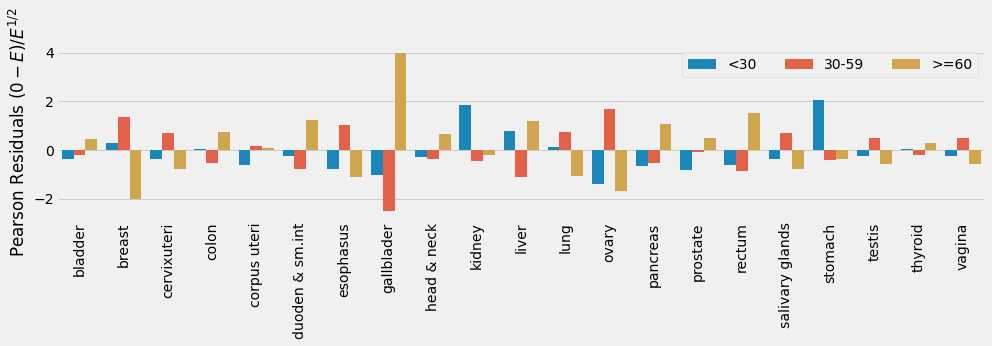

In [80]:
Diffs = (O-E)/np.sqrt(E)
DiffsLong = Diffs.reset_index().melt(id_vars=["age"])

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()
sns.barplot(x="class",y="value",hue="age"
            ,data=DiffsLong,ax=ax
           ,hue_order=["<30","30-59",">=60"])

ax.set_xlabel("")
ax.set_ylabel(r"Pearson Residuals $(0-E)/E^{1/2}$")

ax.tick_params(axis='x', rotation=90)

ax.legend(ncol=3)

fig.set_size_inches(14,4.5)
fig.set_tight_layout(True)